In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("bmi_500.csv", encoding = "utf-8-sig")
df

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight
...,...,...,...,...
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity


In [3]:
# 평균
np.mean(df["Height"])

169.944

In [4]:
# 모분산
print(np.var(df["Height"], ddof = 1))

# 표본분산
print(np.var(df["Height"]))

268.1491623246496
267.6128640000003


In [5]:
# 모표준편차
print(np.std(df["Height"], ddof = 1))

# 표본표준편차
print(np.std(df["Height"]))

16.37526067959376
16.35887722308595


(array([42., 45., 50., 47., 60., 42., 62., 69., 47., 36.]),
 array([-1.83044347, -1.46978302, -1.10912257, -0.74846212, -0.38780168,
        -0.02714123,  0.33351922,  0.69417967,  1.05484012,  1.41550057,
         1.77616102]),
 <BarContainer object of 10 artists>)

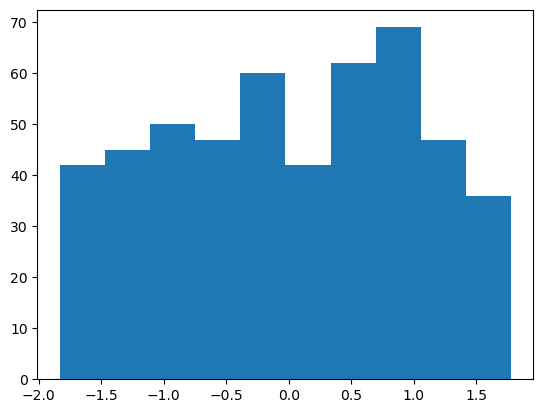

In [6]:
# 표준화

# manual
m = np.mean(df["Height"])
b = np.std(df["Height"])
normalized = [(i - m)/b for i in df["Height"]]
plt.hist(normalized)

(array([42., 45., 50., 47., 60., 42., 62., 69., 47., 36.]),
 array([140. , 145.9, 151.8, 157.7, 163.6, 169.5, 175.4, 181.3, 187.2,
        193.1, 199. ]),
 <BarContainer object of 10 artists>)

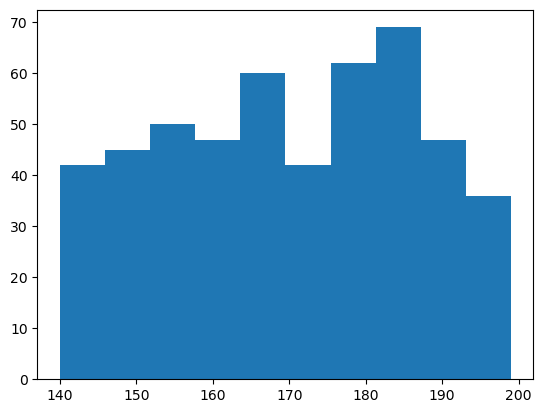

In [7]:
plt.hist(df["Height"])

In [8]:
df.describe()

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


### 표본 추출

In [9]:
import random

# 무작위 비복원 추출
print(random.sample(list(df["Height"]), k = 2))

# 무작위 복원 추출
print(random.choices(list(df["Height"]), k = 2))

[182, 155]
[167, 192]


In [10]:
print(random.choices(list(df["Height"]), k = 2))

print(random.choices(list(df["Height"]), k = 2))

print(random.choices(list(df["Height"]), k = 2))

[179, 164]
[149, 167]
[184, 179]


In [11]:
random.seed(100)
print(random.choices(list(df["Height"]), k = 2))

random.seed(100)
print(random.choices(list(df["Height"]), k = 2))

random.seed(100)
print(random.choices(list(df["Height"]), k = 2))

[141, 188]
[141, 188]
[141, 188]


### 기술 통계량

In [12]:
# X1 분산, 공분산, 공분산, X2 분산
np.cov(df["Height"], df["Weight"])

array([[2.68149162e+02, 2.36472946e-01],
       [2.36472946e-01, 1.04863327e+03]])

In [13]:
# 공분산만 쓰는 경우
np.cov(df["Height"], df["Weight"])[0, 1]

0.2364729458917799

In [14]:
# 상관계수
print(df["Height"].corr(df["Weight"])) # pearson
print(df["Height"].corr(df["Weight"], method = "spearman"))
print(df["Height"].corr(df["Weight"], method = "kendall"))

0.00044594512830534416
-0.0012863887864474118
-0.001875562234011506


In [15]:
from sklearn import metrics
metrics.cohen_kappa_score(df["Height"], df["Weight"])

-0.0032666361673607813

### 회귀분석

In [16]:
import statsmodels.api as sm

X = df["Weight"]
X = sm.add_constant(X)
y = df["Height"]

model = sm.OLS(y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Height   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                 9.904e-05
Date:                Sun, 25 Feb 2024   Prob (F-statistic):              0.992
Time:                        10:28:05   Log-Likelihood:                -2106.9
No. Observations:                 500   AIC:                             4218.
Df Residuals:                     498   BIC:                             4226.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        169.9201      2.511     67.661      0.000     164.986     174.854
Weight         0.0002      0.023      0.010      0.992      -0.044       0.045
==============================================================================
Omnibus:                      191.458   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.385
Skew:                          -0.122   Prob(JB):                     1.13e-06
Kurtosis:                       1.880   Cond. No.                         380.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\USER\AppData\Local\Temp\ipykernel_1252\173563175.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  estimation = [result.params[1] * i + result.params[0] for i in df["Weight"]]


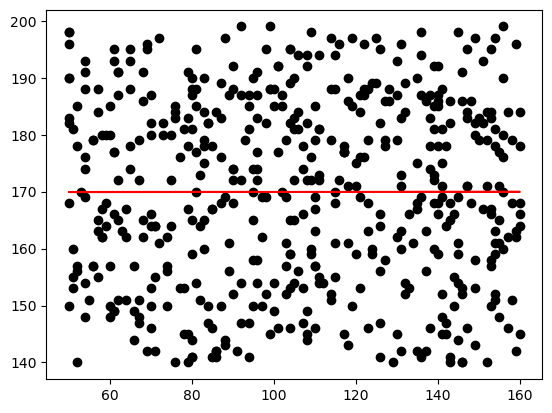

In [17]:
estimation = [result.params[1] * i + result.params[0] for i in df["Weight"]]
plt.scatter(df["Weight"], df["Height"], color = "black")
plt.plot(df["Weight"], estimation, color = "r")
plt.show()

### 조절변수

In [18]:
categorical = pd.get_dummies(df["Label"]).astype(int)
df = pd.concat([df, categorical], axis = 1)
df

,Gender,Height,Weight,Label,Extreme Obesity,Extremely Weak,Normal,Obesity,Overweight,Weak
0,Male,174,96,Obesity,0,0,0,1,0,0
1,Male,189,87,Normal,0,0,1,0,0,0
2,Female,185,110,Obesity,0,0,0,1,0,0
3,Female,195,104,Overweight,0,0,0,0,1,0
4,Male,149,61,Overweight,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
495,Female,150,153,Extreme Obesity,1,0,0,0,0,0
496,Female,184,121,Obesity,0,0,0,1,0,0
497,Female,141,136,Extreme Obesity,1,0,0,0,0,0
498,Male,150,95,Extreme Obesity,1,0,0,0,0,0


In [19]:
df["W*Extreme Obesity"] = df["Weight"] * df["Extreme Obesity"]
df["W*Extremely Weak"] = df["Weight"] * df["Extremely Weak"]
df["W*Normal"] = df["Weight"] * df["Normal"]
df["W*Obesity"] = df["Weight"] * df["Obesity"]
df["W*Overweight"] = df["Weight"] * df["Overweight"]
df["W*Weak"] = df["Weight"] * df["Weak"]
df

,Gender,Height,Weight,Label,Extreme Obesity,Extremely Weak,Normal,Obesity,Overweight,Weak,W*Extreme Obesity,W*Extremely Weak,W*Normal,W*Obesity,W*Overweight,W*Weak
0,Male,174,96,Obesity,0,0,0,1,0,0,0,0,0,96,0,0
1,Male,189,87,Normal,0,0,1,0,0,0,0,0,87,0,0,0
2,Female,185,110,Obesity,0,0,0,1,0,0,0,0,0,110,0,0
3,Female,195,104,Overweight,0,0,0,0,1,0,0,0,0,0,104,0
4,Male,149,61,Overweight,0,0,0,0,1,0,0,0,0,0,61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Female,150,153,Extreme Obesity,1,0,0,0,0,0,153,0,0,0,0,0
496,Female,184,121,Obesity,0,0,0,1,0,0,0,0,0,121,0,0
497,Female,141,136,Extreme Obesity,1,0,0,0,0,0,136,0,0,0,0,0
498,Male,150,95,Extreme Obesity,1,0,0,0,0,0,95,0,0,0,0,0


In [20]:
# X = df["Weight"]
# X = df[["Weight", "Extreme Obesity", "Extremely Weak", "Normal", "Obesity", "Overweight", "Weak"]]
X = df[["Weight", "Extreme Obesity", "Extremely Weak", "Normal", "Obesity", "Overweight", "Weak",
        "W*Extreme Obesity", "W*Extremely Weak", "W*Normal", "W*Obesity", "W*Overweight", "W*Weak"]]
X = sm.add_constant(X)
y = df["Height"]

model = sm.OLS(y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Height   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     88.18
Date:                Sun, 25 Feb 2024   Prob (F-statistic):          1.88e-108
Time:                        10:28:05   Log-Likelihood:                -1833.2
No. Observations:                 500   AIC:                             3690.
Df Residuals:                     488   BIC:                             3741.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               118.8338      9.560     12.430      0.000     100.050     137.617
Weight                0.2846      0.180      1.579      0.115      -0.070       0.639
Extreme Obesity      -3.2135     10.243     -0.314      0.754     -23.340      16.913
Extremely Weak      185.1045     52.924      3.498      0.001      81.118     289.091
Normal               -7.8985     11.134     -0.709      0.478     -29.775      13.978
Obesity             -14.9197     10.235     -1.458      0.146     -35.029       5.190
Overweight          -20.1128     11.023     -1.825      0.069     -41.771       1.546
Weak                -20.1262     22.159     -0.908      0.364     -63.665      23.412
W*Extreme Obesity     0.0567      0.182      0.311      0.756      -0.301       0.415
W*Extremely Weak     -2.5364      1.022     -2.482      0.013      -4.545      -0.528
W*Normal              0.6320      0.198      3.196      0.001       0.243       1.021
W*Obesity             0.3635      0.183      1.983      0.048       0.003       0.724
W*Overweight          0.6047      0.191      3.172      0.002       0.230       0.979
W*Weak                1.1641      0.381      3.058      0.002       0.416       1.912
==============================================================================
Omnibus:                       11.470   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               16.178
Skew:                          -0.198   Prob(JB):                     0.000307
Kurtosis:                       3.787   Cond. No.                     4.44e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.53e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

C:\Users\USER\AppData\Local\Temp\ipykernel_1252\1183605212.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  estimation += X[X.columns[i]] * result.params[i]


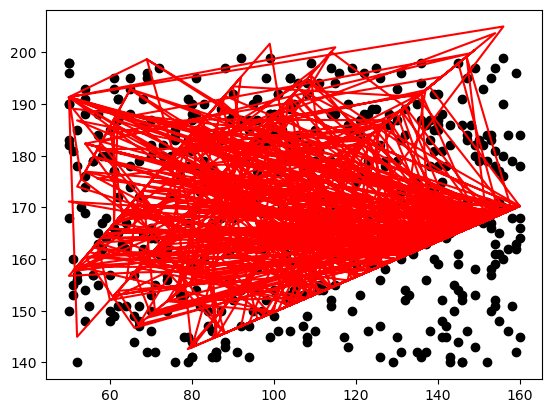

In [21]:
estimation = pd.Series(0, index = range(500))
for i in range(len(result.params)):
    estimation += X[X.columns[i]] * result.params[i]

plt.scatter(df["Weight"], df["Height"], color = "black")
plt.plot(df["Weight"], estimation, color = "r")
plt.show()

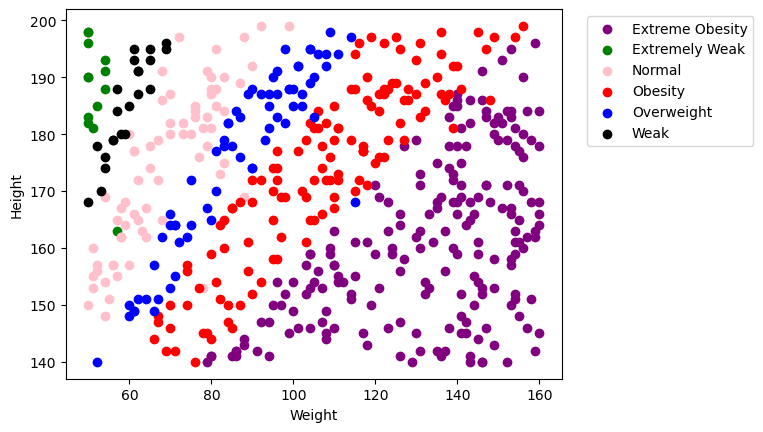

In [22]:
# 산점도로 표시
moderators = ["Extreme Obesity", "Extremely Weak", "Normal", "Obesity", "Overweight", "Weak"]
colors = ['purple', 'green', 'pink', 'red', 'blue', 'black']

for i in range(6):
    temp = df[df["Label"] == moderators[i]]
    plt.scatter(temp["Weight"], temp["Height"], color = colors[i], label = moderators[i])
    
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()   

### 잔차분석

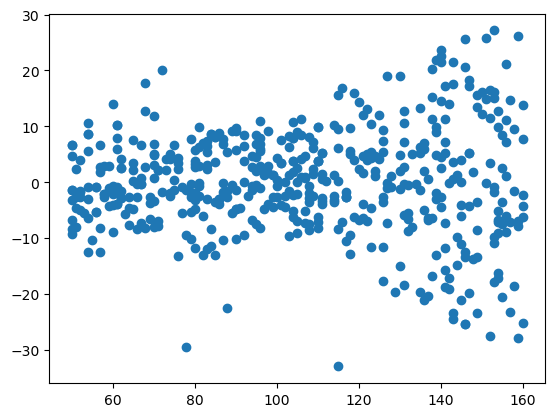

In [23]:
residual = [df["Height"][a] - i for a, i in enumerate(estimation)]
plt.scatter(df["Weight"], residual)

KstestResult(statistic=0.39732297980608533, pvalue=1.0477788367729062e-71)


(array([  4.,  10.,  17.,  34., 107., 148., 108.,  43.,  20.,   9.]),
 array([-32.9902556 , -26.97567119, -20.96108678, -14.94650237,
         -8.93191796,  -2.91733355,   3.09725086,   9.11183527,
         15.12641968,  21.14100409,  27.1555885 ]),
 <BarContainer object of 10 artists>)

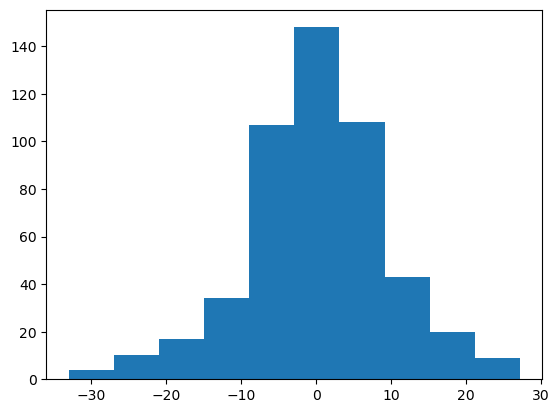

In [24]:
# 정규성 검정
from scipy.stats import kstest

print(kstest(residual, 'norm'))
plt.hist(residual)

In [25]:
import scipy.stats as stats
import math

# 등분산성
cnt = 0
epoch = 0
for i in range(math.floor(len(df["Height"])/10)):
    for w in range(i+1, math.floor(len(df["Height"])/10)):
        value = stats.bartlett(residual[i*10:(i+1)*10], residual[w*10:(w+1)*10])[1]
        if value > 0.001:
            cnt += 1
        else:
            pass
        epoch += 1
print(cnt)
print(epoch)

1224
1225


### 카이제곱검정

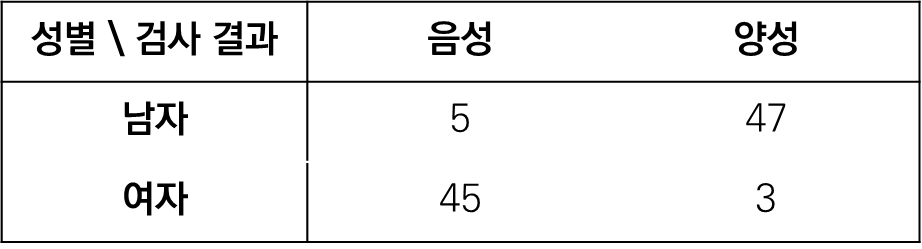

In [26]:
from scipy.stats import chisquare

#  적합도 검정: 성비가 6:4일 때, 카이제곱 검정 (측정값, 기댓값 순)
expected = [0.6, 0.4]
observed = [0.52, 0.48]
chi2, p = chisquare(observed, f_exp = expected)

print(f"카이제곱 통계량: {chi2}")
print(f"P-value: {p}")

카이제곱 통계량: 0.026666666666666637
P-value: 0.8702827722810359


In [27]:
from scipy.stats import chi2_contingency

# 동질성, 독립성 검정: 남자와 여자의 검사 결과 분포 차이
data = [[5, 47], [45, 3]]
chi2, p, dof, expected = chi2_contingency(data)

print(f"카이제곱 통계량: {chi2}")
print(f"P-value: {p}")

카이제곱 통계량: 67.34775641025642
P-value: 2.2760088834871043e-16


### ANOVA

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(v

<AxesSubplot:xlabel='Label', ylabel='Weight'>

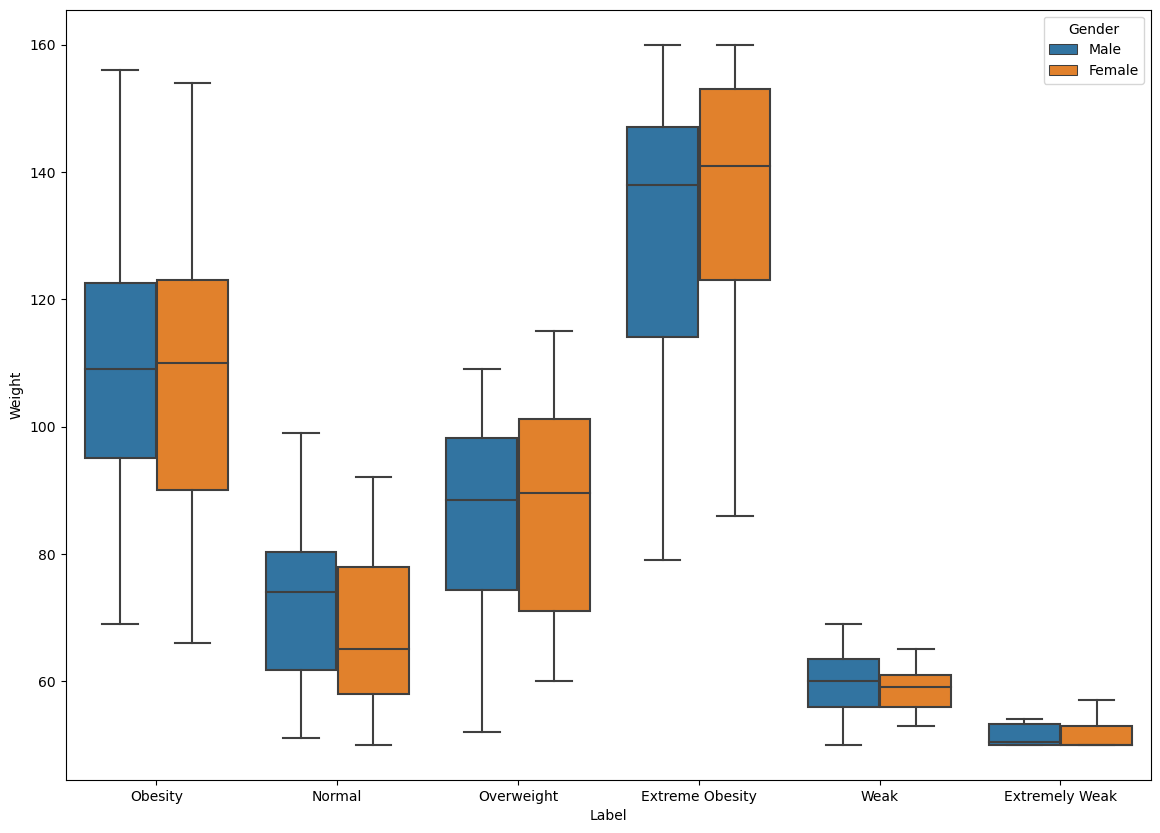

In [28]:
# Boxplot
import seaborn as sns

plt.figure(figsize=(14, 10))
sns.boxplot(x="Label", y="Weight", hue="Gender", data=df)

In [29]:
# ANOVA
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = 'Weight ~ Gender*Label'

two_anova = ols(model, data=df).fit()

anova_lm(two_anova)

C:\Users\USER\anaconda3\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\USER\anaconda3\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)


,df,sum_sq,mean_sq,F,PR(>F)
Gender,1.0,47.450980,47.450980,0.133932,7.145484e-01
Label,5.0,348870.714409,69774.142882,196.939546,1.427552e-114
Gender:Label,5.0,1455.246113,291.049223,0.821495,5.347076e-01
Residual,488.0,172894.588498,354.292190,NaN,NaN


In [30]:
# post-hoc analysis: Tukeys
from statsmodels.stats.multicomp import pairwise_tukeyhsd

m_comp = pairwise_tukeyhsd(endog=df['Weight'], groups=df['Gender'] + df['Label'], alpha=0.05)
print("\nTukey's Test Results:")
print(m_comp)


Tukey's Test Results:
                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
        group1               group2        meandiff p-adj    lower    upper   reject
------------------------------------------------------------------------------------
FemaleExtreme Obesity FemaleExtremely Weak -83.6697    0.0 -107.8967 -59.4428   True
FemaleExtreme Obesity         FemaleNormal -68.6001    0.0  -80.1881 -57.0121   True
FemaleExtreme Obesity        FemaleObesity -27.4565    0.0  -37.1983 -17.7146   True
FemaleExtreme Obesity     FemaleOverweight -47.8047    0.0  -59.9383  -35.671   True
FemaleExtreme Obesity           FemaleWeak -76.8126    0.0 -101.0396 -52.5856   True
FemaleExtreme Obesity  MaleExtreme Obesity  -4.9745 0.7857  -13.7766   3.8276  False
FemaleExtreme Obesity   MaleExtremely Weak -84.0269    0.0 -110.0638 -57.9899   True
FemaleExtreme Obesity           MaleNormal -63.2769    0.0  -76.6017  -49.952   True
FemaleExtreme Obesity          MaleObesity

In [31]:
tukey_results = pd.DataFrame(data=m_comp._results_table.data[1:], columns=m_comp._results_table.data[0])
tukey_results['reject'] = tukey_results['reject'].apply(lambda x: 'True' if x else 'False')
print("\nTukey's Test Results (Formatted):")
tukey_results


Tukey's Test Results (Formatted):


,group1,group2,meandiff,p-adj,lower,upper,reject
0,FemaleExtreme Obesity,FemaleExtremely Weak,-83.6697,0.0000,-107.8967,-59.4428,True
1,FemaleExtreme Obesity,FemaleNormal,-68.6001,0.0000,-80.1881,-57.0121,True
2,FemaleExtreme Obesity,FemaleObesity,-27.4565,0.0000,-37.1983,-17.7146,True
3,FemaleExtreme Obesity,FemaleOverweight,-47.8047,0.0000,-59.9383,-35.6710,True
4,FemaleExtreme Obesity,FemaleWeak,-76.8126,0.0000,-101.0396,-52.5856,True
...,...,...,...,...,...,...,...
61,MaleNormal,MaleOverweight,13.6875,0.1790,-2.3085,29.6835,False
62,MaleNormal,MaleWeak,-12.5167,0.6386,-32.2954,7.2621,False
63,MaleObesity,MaleOverweight,-21.8761,0.0000,-35.4470,-8.3051,True
64,MaleObesity,MaleWeak,-48.0802,0.0000,-65.9547,-30.2057,True


### 로지스틱 회귀

In [37]:
df["Weight*Height"] = df["Weight"] * df["Height"]

df["Gender"] = [1 if i == "Male" else 0 for i in df["Gender"]]

In [44]:
# X = df["Weight"]
# X = df[["Weight", "Height"]]
X = df[["Weight", "Height", "Weight*Height"]]
X = sm.add_constant(X)
y = df["Extreme Obesity"]

model = sm.Logit(y, X)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.049467
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Extreme Obesity   No. Observations:                  500
Model:                          Logit   Df Residuals:                      496
Method:                           MLE   Df Model:                            3
Date:                Sun, 25 Feb 2024   Pseudo R-squ.:                  0.9263
Time:                        11:36:42   Log-Likelihood:                -24.734
converged:                       True   LL-Null:                       -335.68
Covariance Type:            nonrobust   LLR p-value:                1.811e-134
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            67.2057     22.417      2.998      0.003      23.269     111.142
Weight            0.7777      0.236      3.290      0.001       0.314       1.241
Height           -0.8662      0.208     -4.172      0.000      -1.273      -0.459
Weight*Height    -0.0006      0.001     -0.578      0.563      -0.002       0.001
=================================================================================

Possibly complete quasi-separation: A fraction 0.76 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""